In [16]:
import pandas as pd


path = '/content/drive/My Drive/Colab Notebooks/lab05-06/egyetemek.txt'
towns = []

with open(path, 'r') as file:
    items = file.readlines()
    # filter the states
    states = list(filter(lambda x: ('[edit]' in x) and (all(c.isalpha() or c == '[' or c == ']' or c.isspace() for c in x)), items))
    # print(states)

    statesNr = len(states)
    # print(statesNr)

    tchars = '[]().,?'

    for i, state in enumerate(states):
        start = items.index(state) + 1

        if i == statesNr-1: 
            end = len(items)
        else:
            end = items.index(states[i+1])

        tu = list(filter(lambda x: all(c.isalpha() or c.isspace() or c.isnumeric() or (c in tchars) for c in x), items[start:end]))

        pairs = map(lambda x: [state, x], tu)
        towns.extend(pairs)
    
df = pd.DataFrame(towns, columns=['State', 'Town'])
df.head()

,State,Town
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


In [17]:
def clean_town(item):
  return item[:item.find('(') - 1]

df['Town'] = df.Town.apply(clean_town)
df.head()

,State,Town
0,Alabama[edit]\n,Auburn
1,Alabama[edit]\n,Florence
2,Alabama[edit]\n,Jacksonville
3,Alabama[edit]\n,Livingston
4,Alabama[edit]\n,Montevallo


In [18]:
def clean_state(item):
  return item[:item.find('[')]

df['State'] = df.State.apply(clean_state)
df.head()

,State,Town
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


In [19]:
df = df.drop_duplicates()
df.shape

(465, 2)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

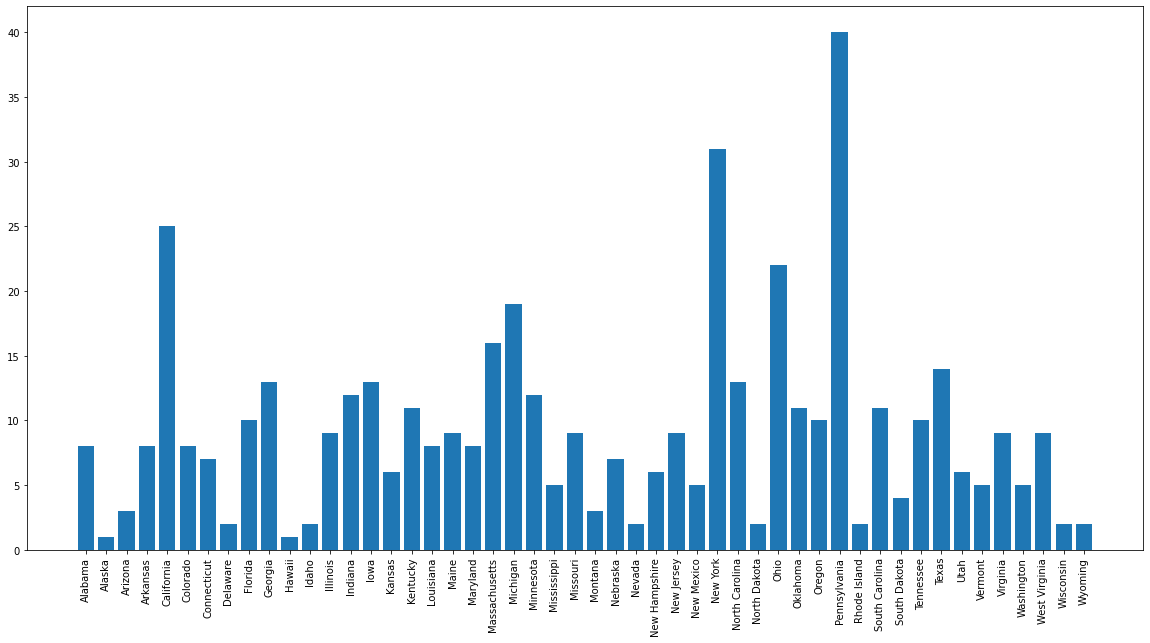

In [22]:
import matplotlib.pyplot as plt

by_state = df.groupby(['State'])
# print(by_state.count())
states = by_state.groups.keys()

plt.bar(states, by_state.Town.count())

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)